In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Matplotlib is building the font cache; this may take a moment.


In [9]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [10]:
img_width = 180
img_height = 180

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [66]:
data_cat = data_train.class_names

In [67]:
data_cat


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [14]:
 data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                  image_size = (img_height, img_width),
                                                  batch_size = 32,
                                                  shuffle = False,
                                                  validation_split = False)

Found 351 files belonging to 36 classes.


In [15]:
 data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                  image_size = (img_height, img_width),
                                                  batch_size = 32,
                                                  shuffle = False,
                                                  validation_split = False)

Found 359 files belonging to 36 classes.


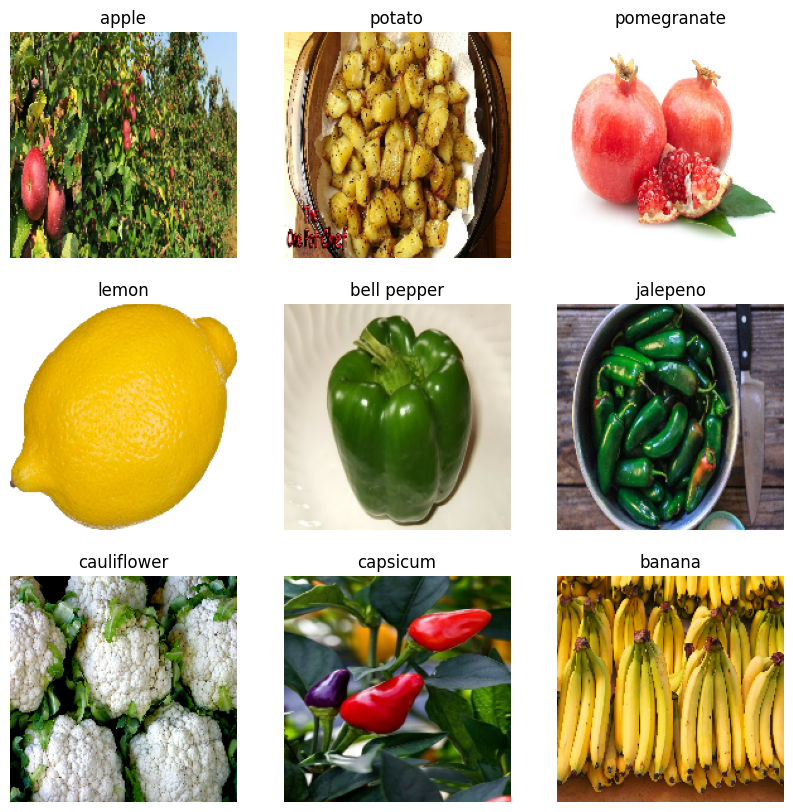

In [24]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [27]:
from tensorflow.keras.models import Sequential

In [37]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [38]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [40]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.0661 - loss: 4.4980 - val_accuracy: 0.2621 - val_loss: 2.4657
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 622ms/step - accuracy: 0.2847 - loss: 2.5075 - val_accuracy: 0.6211 - val_loss: 1.6457
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 607ms/step - accuracy: 0.4721 - loss: 1.8903 - val_accuracy: 0.7749 - val_loss: 0.9865
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 604ms/step - accuracy: 0.6279 - loss: 1.3631 - val_accuracy: 0.8775 - val_loss: 0.6013
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 704ms/step - accuracy: 0.7501 - loss: 0.8764 - val_accuracy: 0.8604 - val_loss: 0.5902
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 713ms/step - accuracy: 0.8387 - loss: 0.5976 - val_accuracy: 0.9174 - val_loss: 0.4406
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 532ms/step - accuracy: 0.9113 - loss: 0.3797 - val_accuracy: 0.9402 - val_loss: 0.3657
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 566ms/step - accuracy: 0.9445 - loss: 0.2375 - val_accura

Text(0.5, 1.0, 'Loss')

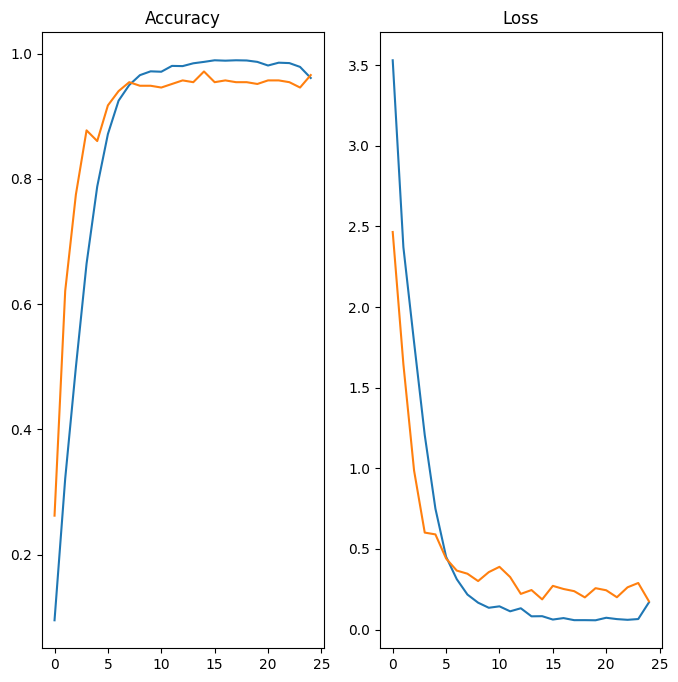

In [42]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='training accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'validation accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='training loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'validation loss')
plt.title('Loss')


In [60]:
image = 'Fruits_Vegetables/corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [61]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [62]:
score = tf.nn.softmax(predict)

In [63]:
print('Veg/fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/fruit in image is sweetcorn with accuracy of 79.85


In [65]:
model.save('image_classifier.keras')